In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import models, layers

%matplotlib inline


train_data = pd.read_csv('titanic_dataset/train.csv')
test_data = pd.read_csv('titanic_dataset/test.csv')

train_data.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


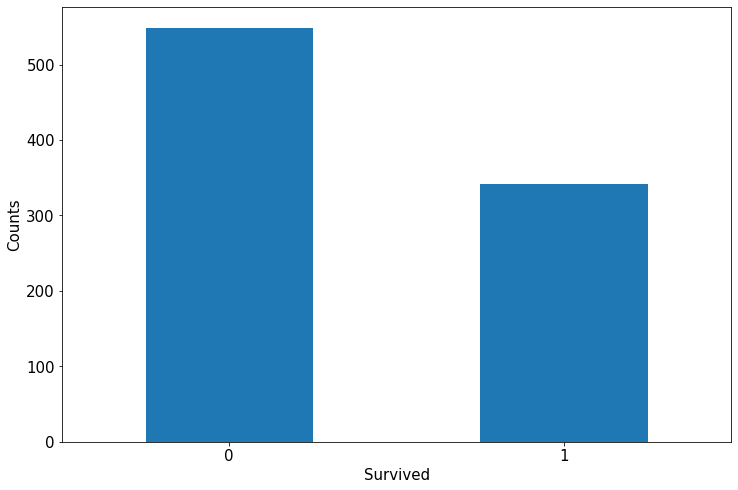

In [24]:
ax = train_data['Survived'].value_counts().plot(kind='bar', 
                                                figsize=(12, 8), 
                                                fontsize=15,
                                                rot=0)
ax.set_ylabel('Counts', fontsize=15)
ax.set_xlabel('Survived', fontsize=15)
plt.show()

Text(0.5, 0, 'Age')

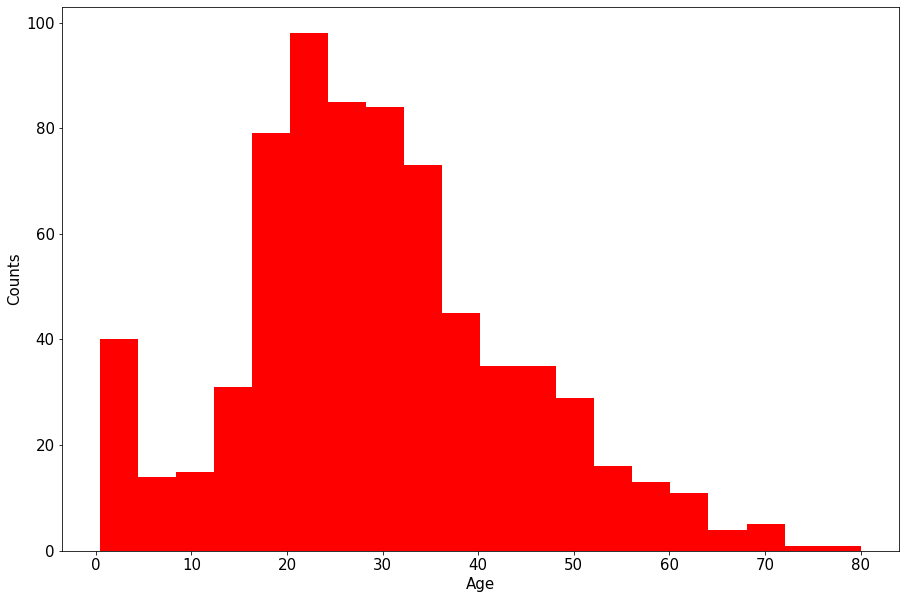

In [25]:
ax = train_data['Age'].plot(kind='hist', 
                           bins=20,
                           color='red',
                           figsize=(15, 10),
                           fontsize=15)
ax.set_ylabel('Counts', fontsize=15)
ax.set_xlabel('Age', fontsize=15)


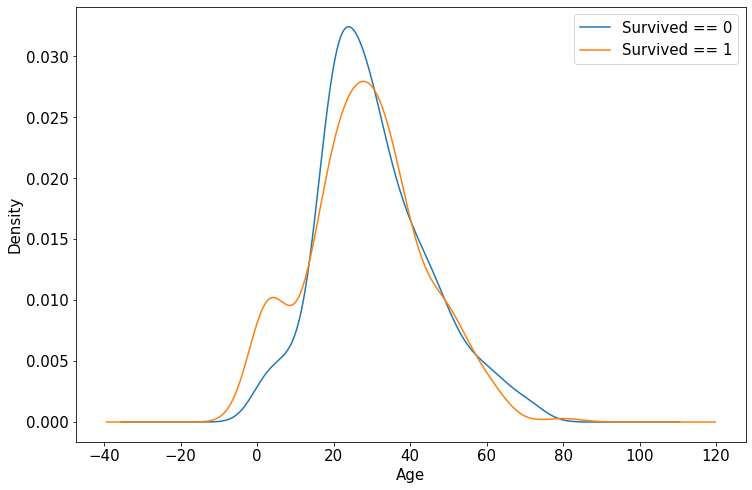

In [26]:
ax = train_data.query('Survived == 0')['Age'].plot(kind='density',
                                                   figsize=(12, 8),
                                                   fontsize=15
                                                  )
train_data.query('Survived == 1')['Age'].plot(kind='density',
                                              figsize=(12, 8),
                                              fontsize=15)
ax.legend(['Survived == 0', 'Survived == 1'], fontsize=15)
ax.set_ylabel('Density', fontsize=15)
ax.set_xlabel('Age', fontsize=15)

plt.show()

In [29]:
def PreprocessingData(data):
    result = pd.DataFrame()
    
    Pclass = pd.get_dummies(data['Pclass'])
    Pclass.columns = ['Pclass_' + str(x) for x in Pclass.columns]
    result = pd.concat([result, Pclass], axis=1)
    
    Sex = pd.get_dummies(data['Sex'])
    result = pd.concat([result, Sex], axis=1)
    
    result['Age'] = data['Age'].fillna(0)
    result['Age_null'] = pd.isna(data['Age']).astype('int32')
    
    result['SibSp'] = data['SibSp']
    result['Parch'] = data['Parch']
    result['Fare']  = data['Fare']
    
    result['Cabin_null'] = pd.isna(data['Cabin']).astype('int32')
    
    Embarked = pd.get_dummies(data['Embarked'], dummy_na=True)
    Embarked.columns = ['Embarked_' + str(x) for x in Embarked.columns]
    result = pd.concat([result, Embarked], axis=1)
    
    return (result)

In [48]:
x_train = PreprocessingData(train_data)
y_train = train_data['Survived'].values

x_test  = PreprocessingData(test_data)
y_test  = train_data['Survived'].values

print("x_train.shape = ", x_train.shape)
print("y_test.shape = ", x_test.shape)

x_train.shape =  (891, 15)
y_test.shape =  (418, 15)


In [42]:
tf.keras.backend.clear_session()

model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(15, )))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['AUC'])

history = model.fit(x_train, 
                    y_train,
                    batch_size=64,
                    epochs=50,
                    validation_split=0.3
                   )


Train on 623 samples, validate on 268 samples
Epoch 1/50
623/623 [==============================] - 1s 2ms/sample - loss: 0.5167 - AUC: 0.8295 - val_loss: 0.4862 - val_AUC: 0.8375
Epoch 2/50
623/623 [==============================] - 0s 103us/sample - loss: 0.5292 - AUC: 0.8063 - val_loss: 0.4864 - val_AUC: 0.8435
Epoch 3/50
623/623 [==============================] - 0s 101us/sample - loss: 0.5085 - AUC: 0.8308 - val_loss: 0.4779 - val_AUC: 0.8475
Epoch 4/50
623/623 [==============================] - 0s 81us/sample - loss: 0.5045 - AUC: 0.8379 - val_loss: 0.4860 - val_AUC: 0.8458
Epoch 5/50
623/623 [==============================] - 0s 148us/sample - loss: 0.5040 - AUC: 0.8321 - val_loss: 0.4711 - val_AUC: 0.8481
Epoch 6/50
623/623 [==============================] - 0s 110us/sample - loss: 0.5104 - AUC: 0.8292 - val_loss: 0.4674 - val_AUC: 0.8485
Epoch 7/50
623/623 [==============================] - 0s 119us/sample - loss: 0.4991 - AUC: 0.8336 - val_loss: 0.4728 - val_AUC: 0.8484
Epoch

In [51]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics   = history.history['val_' + metric]
    epochs        = range(1, len(train_metrics) + 1)
    
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation ' + metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    
    plt.legend(["train_" + metric, 'val_' + metric])
    plt.show()
    

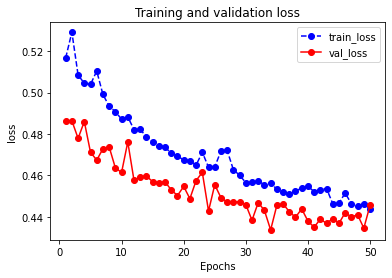

In [52]:
plot_metric(history, "loss")

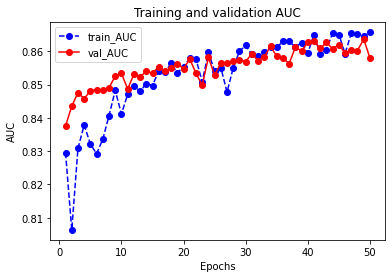

In [53]:
plot_metric(history, "AUC")

In [56]:
x_test


array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [57]:
y_test

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,